# Airline Passengers Time Series (1949–1960)

### Import Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [21]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [22]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
passengers = df['#Passengers'].astype(float).values.reshape(-1, 1)

### Visualize data

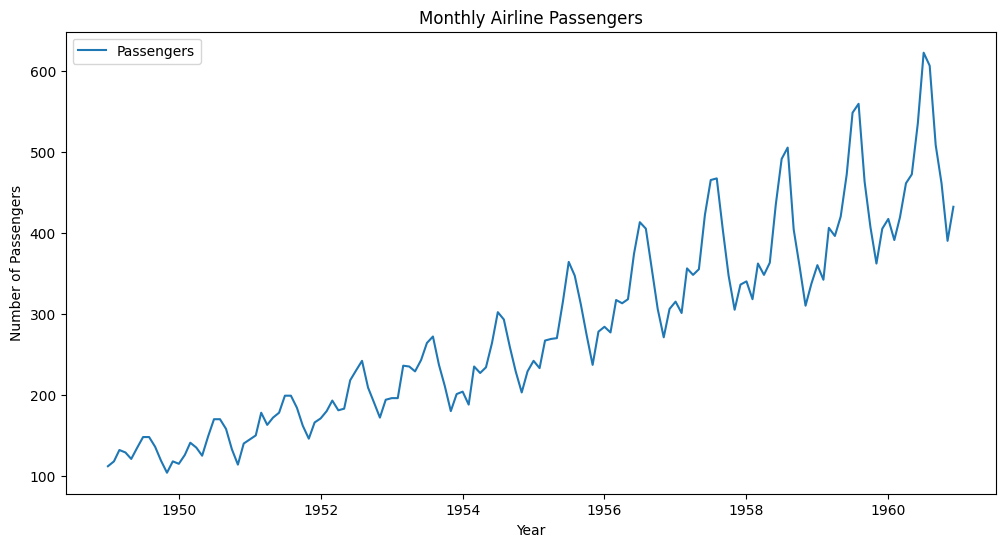

In [23]:
plt.figure(figsize=(12,6))
plt.plot(df, label="Passengers")
plt.title("Monthly Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

### Normalize values

In [24]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df[["#Passengers"]])

### Create sequences for LSTM

In [25]:
def create_sequences(data, time_steps=12):
    X, y = [], []
    for i in range(len(data)-time_steps):
        X.append(data[i:i+time_steps, 0])
        y.append(data[i+time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 12
X, y = create_sequences(scaled_data, time_steps)

X = X.reshape((X.shape[0], X.shape[1], 1))

### Train-Test Split

In [26]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

### Build LSTM Model

In [27]:
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(time_steps,1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Train Model

In [28]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0859 - val_loss: 0.1747
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0237 - val_loss: 0.0264
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0134 - val_loss: 0.0231
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0110 - val_loss: 0.0290
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0095 - val_loss: 0.0382
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0091 - val_loss: 0.0255
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0076 - val_loss: 0.0216
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0074 - val_loss: 0.0215
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0069 - val_loss: 0.0216
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0069 - val_loss: 0.0217
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0065 - val_loss: 0.0213
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0064 - val_loss: 0.0217
E

### Plot Training Loss

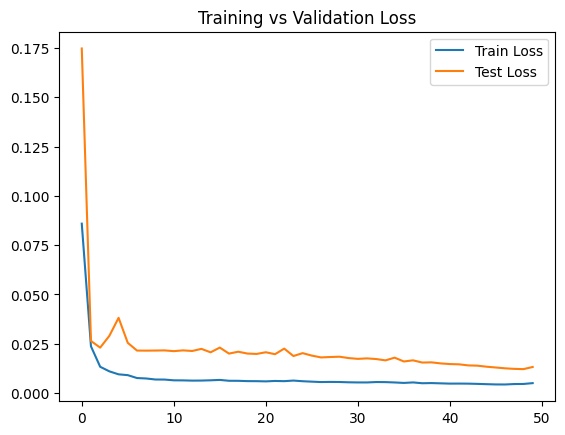

In [29]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

###  Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


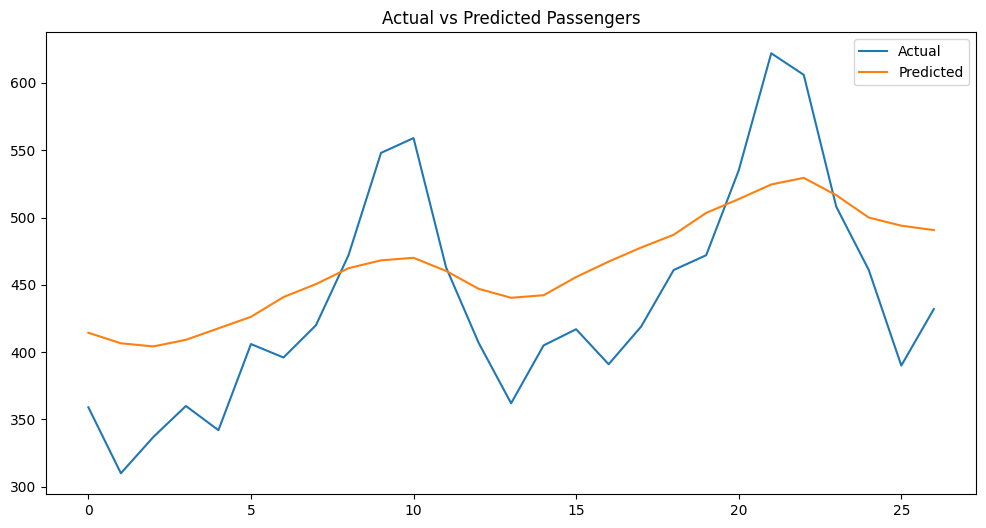

In [30]:
y_pred = model.predict(X_test)

# Inverse scaling
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1,1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1,1))

# Plot results
plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled, label="Actual")
plt.plot(y_pred_rescaled, label="Predicted")
plt.title("Actual vs Predicted Passengers")
plt.legend()
plt.show()

#### Insight

The LSTM model successfully captured both the long-term upward trend and the seasonal fluctuations in the Airline Passengers dataset. The results show that LSTM is effective for time series forecasting, and such a model can be used to predict future passenger demand, helping in better planning and decision-making for airlines.